In [1]:
#import important libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures

from sklearn.svm import SVR
from prettytable import PrettyTable
import math

In [2]:
#read dataset csv file.
df = pd.read_csv('Position_Salaries.csv')

In [3]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
df.isna().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [7]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [8]:
df.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

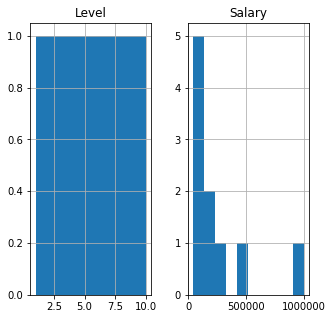

In [9]:
df.hist(figsize=(5,5))
plt.show()

In [10]:
df['Position'].unique

<bound method Series.unique of 0     Business Analyst
1    Junior Consultant
2    Senior Consultant
3              Manager
4      Country Manager
5       Region Manager
6              Partner
7       Senior Partner
8              C-level
9                  CEO
Name: Position, dtype: object>

In [11]:
X = df.iloc[:, :-1]
Y = df.iloc[:, (len(df.columns) - 1)]

In [12]:
# find categorical variables
categorical = [var for var in X.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 1 categorical variables


In [13]:
# find numerical variables
numerical = [var for var in X.columns if df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 1 numerical variables


In [14]:
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, 2].values

In [15]:
pd.DataFrame(X).head()

,0
0,1
1,2
2,3
3,4
4,5


In [16]:
pd.DataFrame(Y).head()

,0
0,45000
1,50000
2,60000
3,80000
4,110000


In [17]:
#Using sklearn linear regression model

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(
        X, Y, test_size=0.25,random_state=42)
    
    
algorithms = {'LinearRegression()':'LinearRegression', 'linear_model.Lasso(alpha=0.1)' : 'Lasso LinearRegression', 
              'LassoCV()' : 'LassoCV LinearRegression', 'PolynomialFeatures(degree=3)' : 'PolynomialFeatures', 'DecisionTreeRegressor()': 'DecisionTree', 'SVR()':'SVR'}
acc_train_test = []
r2_train_test = []
results =  {}
for key, value in algorithms.items():
        if key == "PolynomialFeatures(degree=3)":
            model = eval(key)
            polynomial_features = model.fit_transform(X)
            poly_reg_new = LinearRegression()
            poly_reg_new.fit(polynomial_features, Y)
            print("R^2 score for Polynomial Regresion on this dataset: ",
                  poly_reg_new.score(polynomial_features, Y))
            
        else:
            model = eval(key)
            reg = model.fit(x_data_train,y_data_train)            
            y_pred_train =  reg.predict(x_data_train)
            y_pred_test =  reg.predict(x_data_test)

            r2_train_test.append([value, (r2_score(y_data_train,y_pred_train),r2_score(y_data_test,y_pred_test)), 
                              (reg.score(x_data_train,y_data_train), reg.score(x_data_test,y_data_test))])
results.update({"data": r2_train_test})        
x = PrettyTable()
x.field_names = ["Algorithm", "R2Score (Train/Test)", "Accuracy (Train/Test)"]
r2score = results['data']
for val in range(0 , len(r2score)):
    r2_value = str(math.floor(r2score[val][2][0]*100)) + '/' + str(math.floor(r2score[val][2][1]*100))
    acc_value = str(math.floor(r2score[val][1][0]*100)) + '/' + str(math.floor(r2score[val][1][1]*100))
    x.add_row([r2score[val][0], r2_value, acc_value])
print(x)

R^2 score for Polynomial Regresion on this dataset:  0.9812097727913366
+--------------------------+----------------------+-----------------------+
|        Algorithm         | R2Score (Train/Test) | Accuracy (Train/Test) |
+--------------------------+----------------------+-----------------------+
|     LinearRegression     |        66/63         |         66/63         |
|  Lasso LinearRegression  |        66/63         |         66/63         |
| LassoCV LinearRegression |        66/66         |         66/66         |
|       DecisionTree       |        100/62        |         100/62        |
|           SVR            |       -22/-41        |        -22/-41        |
+--------------------------+----------------------+-----------------------+
